In [2]:
import numpy as np
import matplotlib.pyplot as plt


### #1

In [3]:
def richardson_center (f, z, h, nsteps, args=()):
    """Evaluate the first derivative of a function at z, that is f'(z),
    using Richardson extrapolation and center differencing.

    Returned is the full table of approximations, Fij for j <= i. The
    values of Fij for j > i are set to zero. The final value F[-1,-1]
    should be the most accurate estimate.

    Parameters
    ----------
    f : function
        Vectorized Python function.
        This is the function for which we are estimating the derivative.
    z : number
        Value at which to evaluate the derivative.
    h : number
        Initial stepsize.
    nsteps : integer
        Number of steps to perform.
    args : tuple, optional
        extra arguments to pass to the function, f.
    """
    # Extra check to allow for args=(1) to be handled properly. This is a
    # technical detail that you do not need to worry about.
    if not isinstance(args, (tuple, list, np.ndarray)):
        args = (args,)
    # Create a zero filled table for our estimates
    F = np.zeros((nsteps, nsteps))
    # First column of F is the center differencing estimate.
    # We can fill this without a loop!
    harr = h / 2.**np.arange(nsteps)
    F[:,0] = (f(z+harr, *args) - f(z-harr, *args)) / (2.*harr)
    # Now iterate, unfortunately we do need one loop. We could
    # get rid of the inner loop but the algorithm is a little easier to
    # understand if we do not.
    for i in range(1, nsteps):
        fact = 0.25
        for j in range(1, i+1):
            F[i,j] = F[i-1,j-1] - (F[i-1,j-1] - F[i,j-1])/ (1-fact)
            fact *= 0.25
    return F

def richardson_forward (f, z, h, nsteps, args=()):
    """Evaluate the first derivative of a function at z, that is f'(z),
    using Richardson extrapolation and center differencing.

    Returned is the full table of approximations, Fij for j <= i. The
    values of Fij for j > i are set to zero. The final value F[-1,-1]
    should be the most accurate estimate.

    Parameters
    ----------
    f : function
        Vectorized Python function.
        This is the function for which we are estimating the derivative.
    z : number
        Value at which to evaluate the derivative.
    h : number
        Initial stepsize.
    nsteps : integer
        Number of steps to perform.
    args : tuple, optional
        extra arguments to pass to the function, f.
    """
    # Extra check to allow for args=(1) to be handled properly. This is a
    # technical detail that you do not need to worry about.
    if not isinstance(args, (tuple, list, np.ndarray)):
        args = (args,)
    # Create a zero filled table for our estimates
    F = np.zeros((nsteps, nsteps))
    # First column of F is the center differencing estimate.
    # We can fill this without a loop!
    harr = h / 2.**np.arange(nsteps)
    F[:,0] = (f(z+harr, *args) - f(z, *args)) / harr
    # Now iterate, unfortunately we do need one loop. We could
    # get rid of the inner loop but the algorithm is a little easier to
    # understand if we do not.
    for i in range(1, nsteps):
        fact = 0.5
        for j in range(1, i+1):
            F[i,j] = F[i-1,j-1] - (F[i-1,j-1] - F[i,j-1])/ (1-fact)
            fact *= 0.5
    return F

$h=10^{-4}$:  1.0239231684749939e-10
$h=10^{-5}$:  5.146993942162226e-13
$h=10^{-6}$:  2.0949397772085376e-10
$h=10^{-7}$:  7.319420625151452e-10


(1, 1e-08)

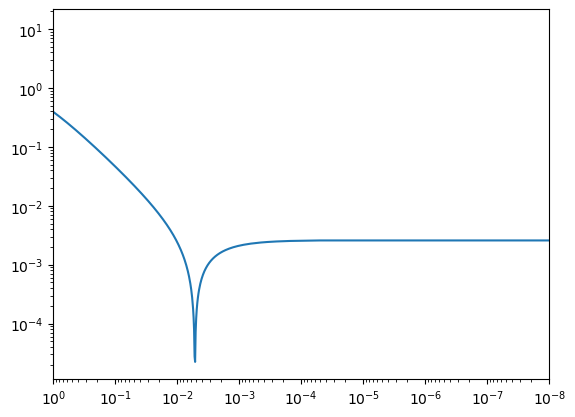

In [4]:
def f(x):
    return np.exp(-x/4)

def deriv(x,h):
    return (f(x+h)-f(x-h))/(2*h)

x = np.linspace(-5,5,100000)
h = np.linspace(1,1e-8, 100000)

true = (-1/4)*f(.65)

print(r'$h=10^{-4}$: ', np.abs(1-(deriv(.65, 1e-4)/true)))
print(r'$h=10^{-5}$: ', np.abs(1-(deriv(.65, 1e-5)/true)))
print(r'$h=10^{-6}$: ', np.abs(1-(deriv(.65, 1e-6)/true)))
print(r'$h=10^{-7}$: ', np.abs(1-(deriv(.65, 1e-7)/true)))

plt.loglog(x, np.abs(1-(deriv(x,h))/(-1/4)*f(x)))
plt.xlim(1, 1e-8)


In [5]:
def e(eps, M):
    h=((3*eps)/M)**(1/3)
    print(h)
    return (eps/h) + (h**2/6)*(M)

e(1e-16, 1/64)

2.6777318003286797e-05


5.601755933196455e-12

### #2

In [6]:
def f(x):
    return (3**x)*(np.sin(x))

z=1.15
h=.4

true = ((3**z)*np.cos(z))+(np.log(3)*np.sin(z)*(3**z))
# true = (np.log(z)*np.sin(z)*(3**z))

c=richardson_center(f, z, h, 8)[-1, -1]
fr = richardson_forward(f, z, h, 8)[-1, -1]
print("center err: ", np.abs(1-(c/true)))
print("forward err: ", np.abs(1-(fr/true)))

center err:  1.4432899320127035e-14
forward err:  6.439293542825908e-14


In [9]:
c=richardson_center(f, z, h, 8)[-1, -1]
fr = richardson_forward(f, z, h, 8)[-1, -1]
print("true val: ", true)
print("center est: ", c)
print("forward est: ", fr)
print("center err: ", np.abs(1-(c/true)))
print("forward err: ", np.abs(1-(fr/true))) 

true val:  4.99225568943156
center est:  4.992255689431632
forward est:  4.992255689431238
center err:  1.4432899320127035e-14
forward err:  6.439293542825908e-14


In [8]:
for i in range(1,20):
    print("i=", i)
    c=richardson_center(f, z, h, i)[-1, -1]
    fr = richardson_forward(f, z, h, i)[-1, -1]
    print("center err: ", np.abs(1-(c/true)))
    print("forward err: ", np.abs(1-(fr/true))) 
    print()

i= 1
center err:  0.014829666873129144
forward err:  0.1315164482544251

i= 2
center err:  0.0002710270558137218
forward err:  0.013549622826160457

i= 3
center err:  6.0837150872572465e-09
forward err:  0.0011999741556315557

i= 4
center err:  1.0999534616473738e-11
forward err:  1.8962247856357806e-05

i= 5
center err:  5.10702591327572e-15
forward err:  6.641061145451488e-08

i= 6
center err:  1.3322676295501878e-15
forward err:  4.2520209575513945e-11

i= 7
center err:  3.019806626980426e-14
forward err:  3.5371705564557487e-13

i= 8
center err:  1.4432899320127035e-14
forward err:  6.439293542825908e-14

i= 9
center err:  9.00390872971002e-14
forward err:  9.43689570931383e-15

i= 10
center err:  5.229150445984487e-14
forward err:  1.1546319456101628e-13

i= 11
center err:  4.0234482412415673e-13
forward err:  1.4208634269152753e-12

i= 12
center err:  2.4447111002245947e-13
forward err:  6.303846333821639e-13

i= 13
center err:  1.7705836796721997e-12
forward err:  5.691891402648